In [1]:
import pandas as pd

from pandas_datareader import data
from datetime import datetime

In [2]:
fig_size = (12, 4)
today = datetime.today().strftime('%Y-%m-%d')

In [3]:
def get_ma_analysis(ticker, start_date='1900-01-01', end_date=datetime.today().strftime('%Y-%m-%d'), ma_period=200):
    panel_data = data.DataReader(ticker, 'yahoo', start_date, end_date).reset_index()
    panel_data['MA'] = panel_data['Close'].rolling(ma_period).mean()
    panel_data['PC_MA'] = 100 * (panel_data['Close'] - panel_data['MA']) / panel_data['MA']
    panel_data['PC_MA_MEAN'] = panel_data['PC_MA'].mean()
    panel_data['PC_MA_MEDIAN'] = panel_data['PC_MA'].median()
    print(panel_data[['Date', 'Close', 'MA', 'PC_MA', 'PC_MA_MEAN', 'PC_MA_MEDIAN']].tail(1).set_index('Date'))
    return panel_data
        
def plot_ma_analysis(panel_data, start_date='2000-01-01', end_date=datetime.today().strftime('%Y-%m-%d'),
                     title='', bins=100):
    panel_data[(panel_data['Date'] >= start_date) & (panel_data['Date'] <= end_date)].plot(
        x='Date', y=['Close', 'MA'], style = ['-', '--'],
        figsize=fig_size, grid=True, title=title)
    panel_data[(panel_data['Date'] >= start_date) & (panel_data['Date'] <= end_date)].plot(
        x='Date', y=['PC_MA', 'PC_MA_MEAN', 'PC_MA_MEDIAN'], style=['-', '--', '--'],
        figsize=fig_size, grid=True, title=title)
    panel_data.plot(
        x='Date', y=['PC_MA'], kind='hist', bins=bins,
        figsize=fig_size, grid=True, title=title)

                  Close           MA     PC_MA  PC_MA_MEAN  PC_MA_MEDIAN
Date                                                                    
2020-11-13  3585.149902  3139.660897  14.18908    2.454035       3.63402


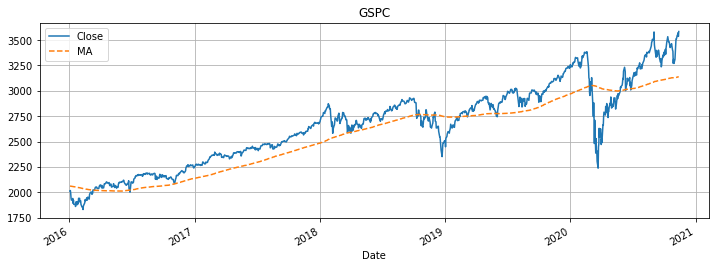

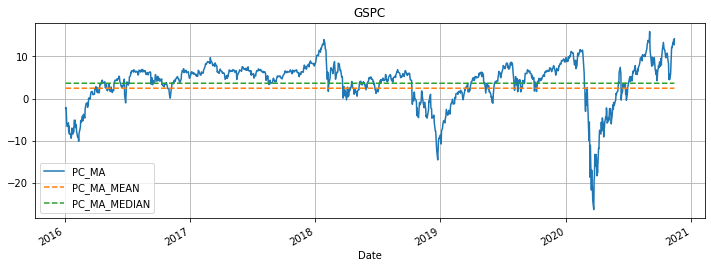

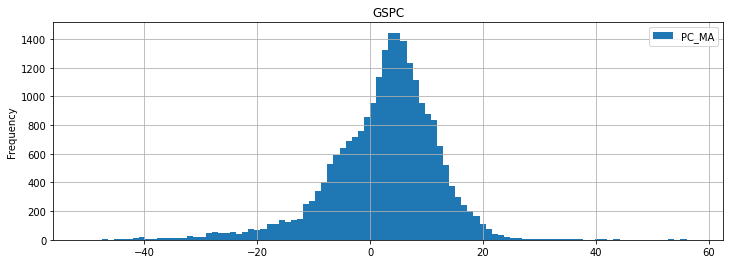

In [4]:
df_gspc = get_ma_analysis(ticker='^GSPC')
plot_ma_analysis(df_gspc, start_date='2016-01-01', title='GSPC')

            Close        MA    PC_MA  PC_MA_MEAN  PC_MA_MEDIAN
Date                                                          
2020-11-13  87.82  87.42625  0.45038    0.459336      0.693337


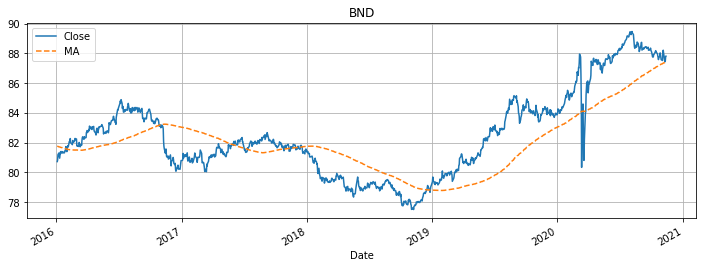

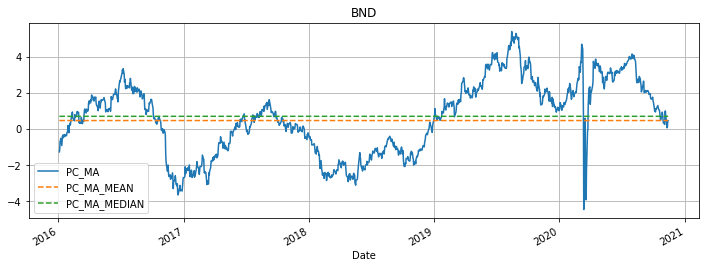

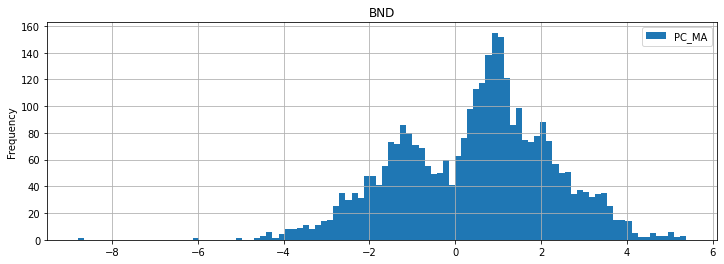

In [5]:
df_gspc = get_ma_analysis(ticker='BND')
plot_ma_analysis(df_gspc, start_date='2016-01-01', title='BND')

                Close       MA     PC_MA  PC_MA_MEAN  PC_MA_MEDIAN
Date                                                              
2020-11-13  82.849998  81.7948  1.290056    0.273373      0.269041


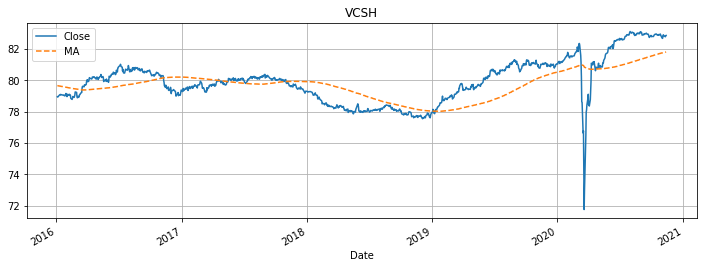

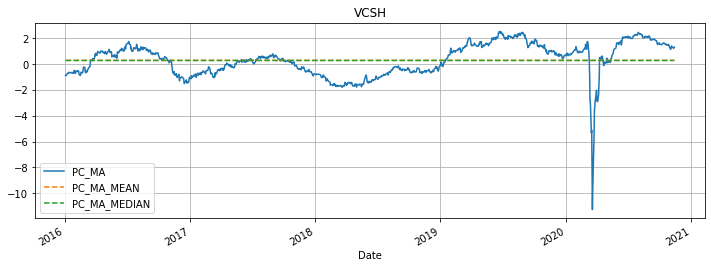

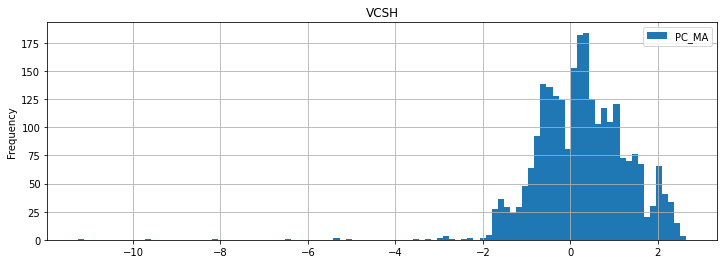

In [7]:
df_gspc = get_ma_analysis(ticker='VCSH')
plot_ma_analysis(df_gspc, start_date='2016-01-01', title='VCSH')

                   Close            MA      PC_MA  PC_MA_MEAN  PC_MA_MEDIAN
Date                                                                       
2020-11-13  12719.950195  10709.367012  18.774062    2.940466      4.071944


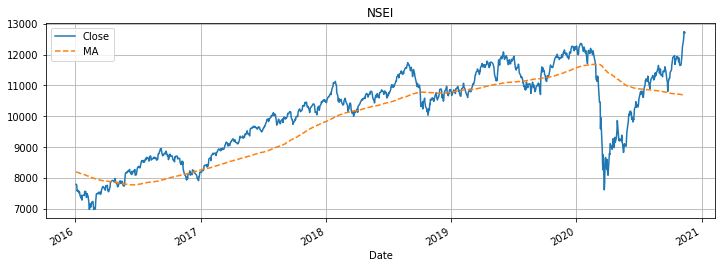

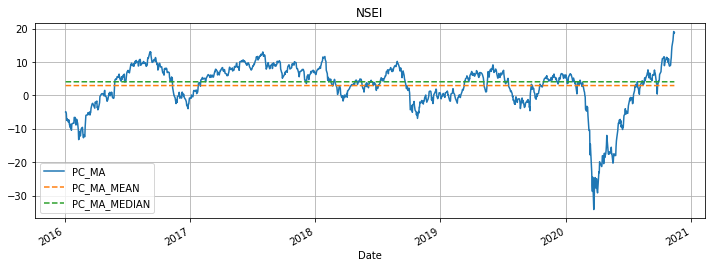

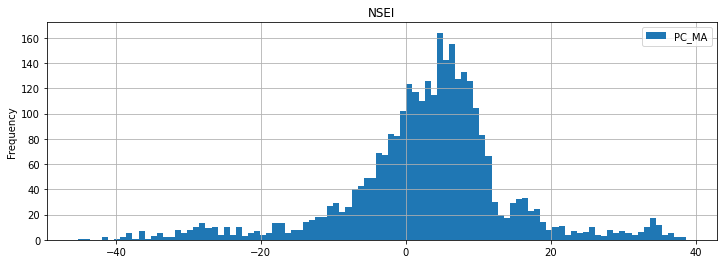

In [6]:
df_gspc = get_ma_analysis(ticker='^NSEI')
plot_ma_analysis(df_gspc, start_date='2016-01-01', title='NSEI')

                Close         MA     PC_MA  PC_MA_MEAN  PC_MA_MEDIAN
Date                                                                
2020-11-13  74.864998  74.695421  0.227024    1.225275       0.63794


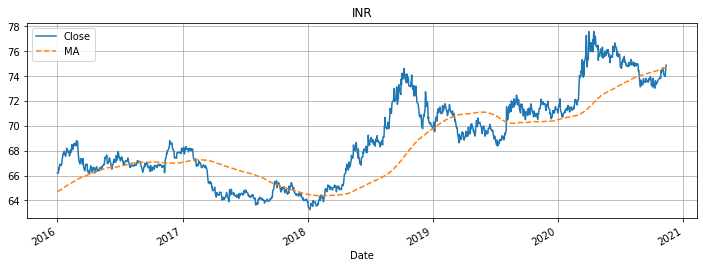

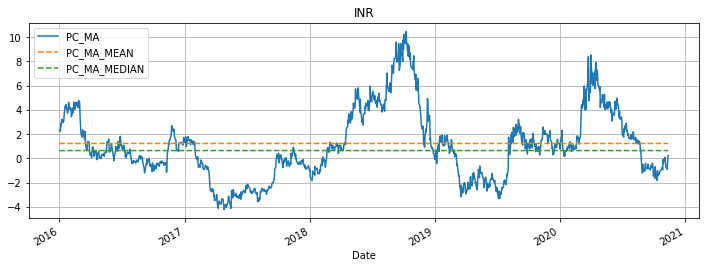

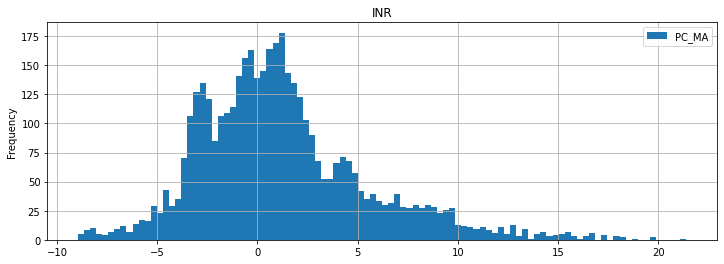

In [8]:
df_gspc = get_ma_analysis(ticker='INR=X')
plot_ma_analysis(df_gspc, start_date='2016-01-01', title='INR')